In [75]:
# Import modules
import nest
import matplotlib.pyplot as plt

In [77]:
# Reset simulation kernel
nest.ResetKernel()

# Set simulation kernel
nest.SetKernelStatus({"local_num_threads": 1,"resolution": 0.1,"rng_seeds": [0]})

# Create neurons
popE = nest.Create("iaf_psc_alpha", 1600, {"V_th": -50.0,"tau_m": 20.0})
popI = nest.Create("iaf_psc_alpha", 400, {"V_th": -50.0,"tau_m": 20.0})
pop = popE + popI

# Create devices
pg = nest.Create("poisson_generator", params={"rate": 18000.0})
sdE = nest.Create("spike_detector")
sdI = nest.Create("spike_detector")

# Factor for the synapse strength of the recurrent inhibition
g = 4           # between 2 (SR) and 6 (AI)

# Connect neurons
nest.Connect(popE, pop, conn_spec={"rule": "fixed_indegree","indegree": 200}, syn_spec={"weight": 2.5})
nest.Connect(popI, pop, conn_spec={"rule": "fixed_indegree", "indegree": 50}, syn_spec={"weight": -2.5 * g})

# Connect devices to neurons
nest.Connect(pg, pop, syn_spec={"weight": 2.5})
nest.Connect(popE, sdE)
nest.Connect(popI, sdI)

# Run simulation
nest.Simulate(1000.)

# Get spike events
eventsE = nest.GetStatus(sdE, 'events')[0]
eventsI = nest.GetStatus(sdI, 'events')[0]

Factor for the synapse strength of the recurrent inhibition: g = 4


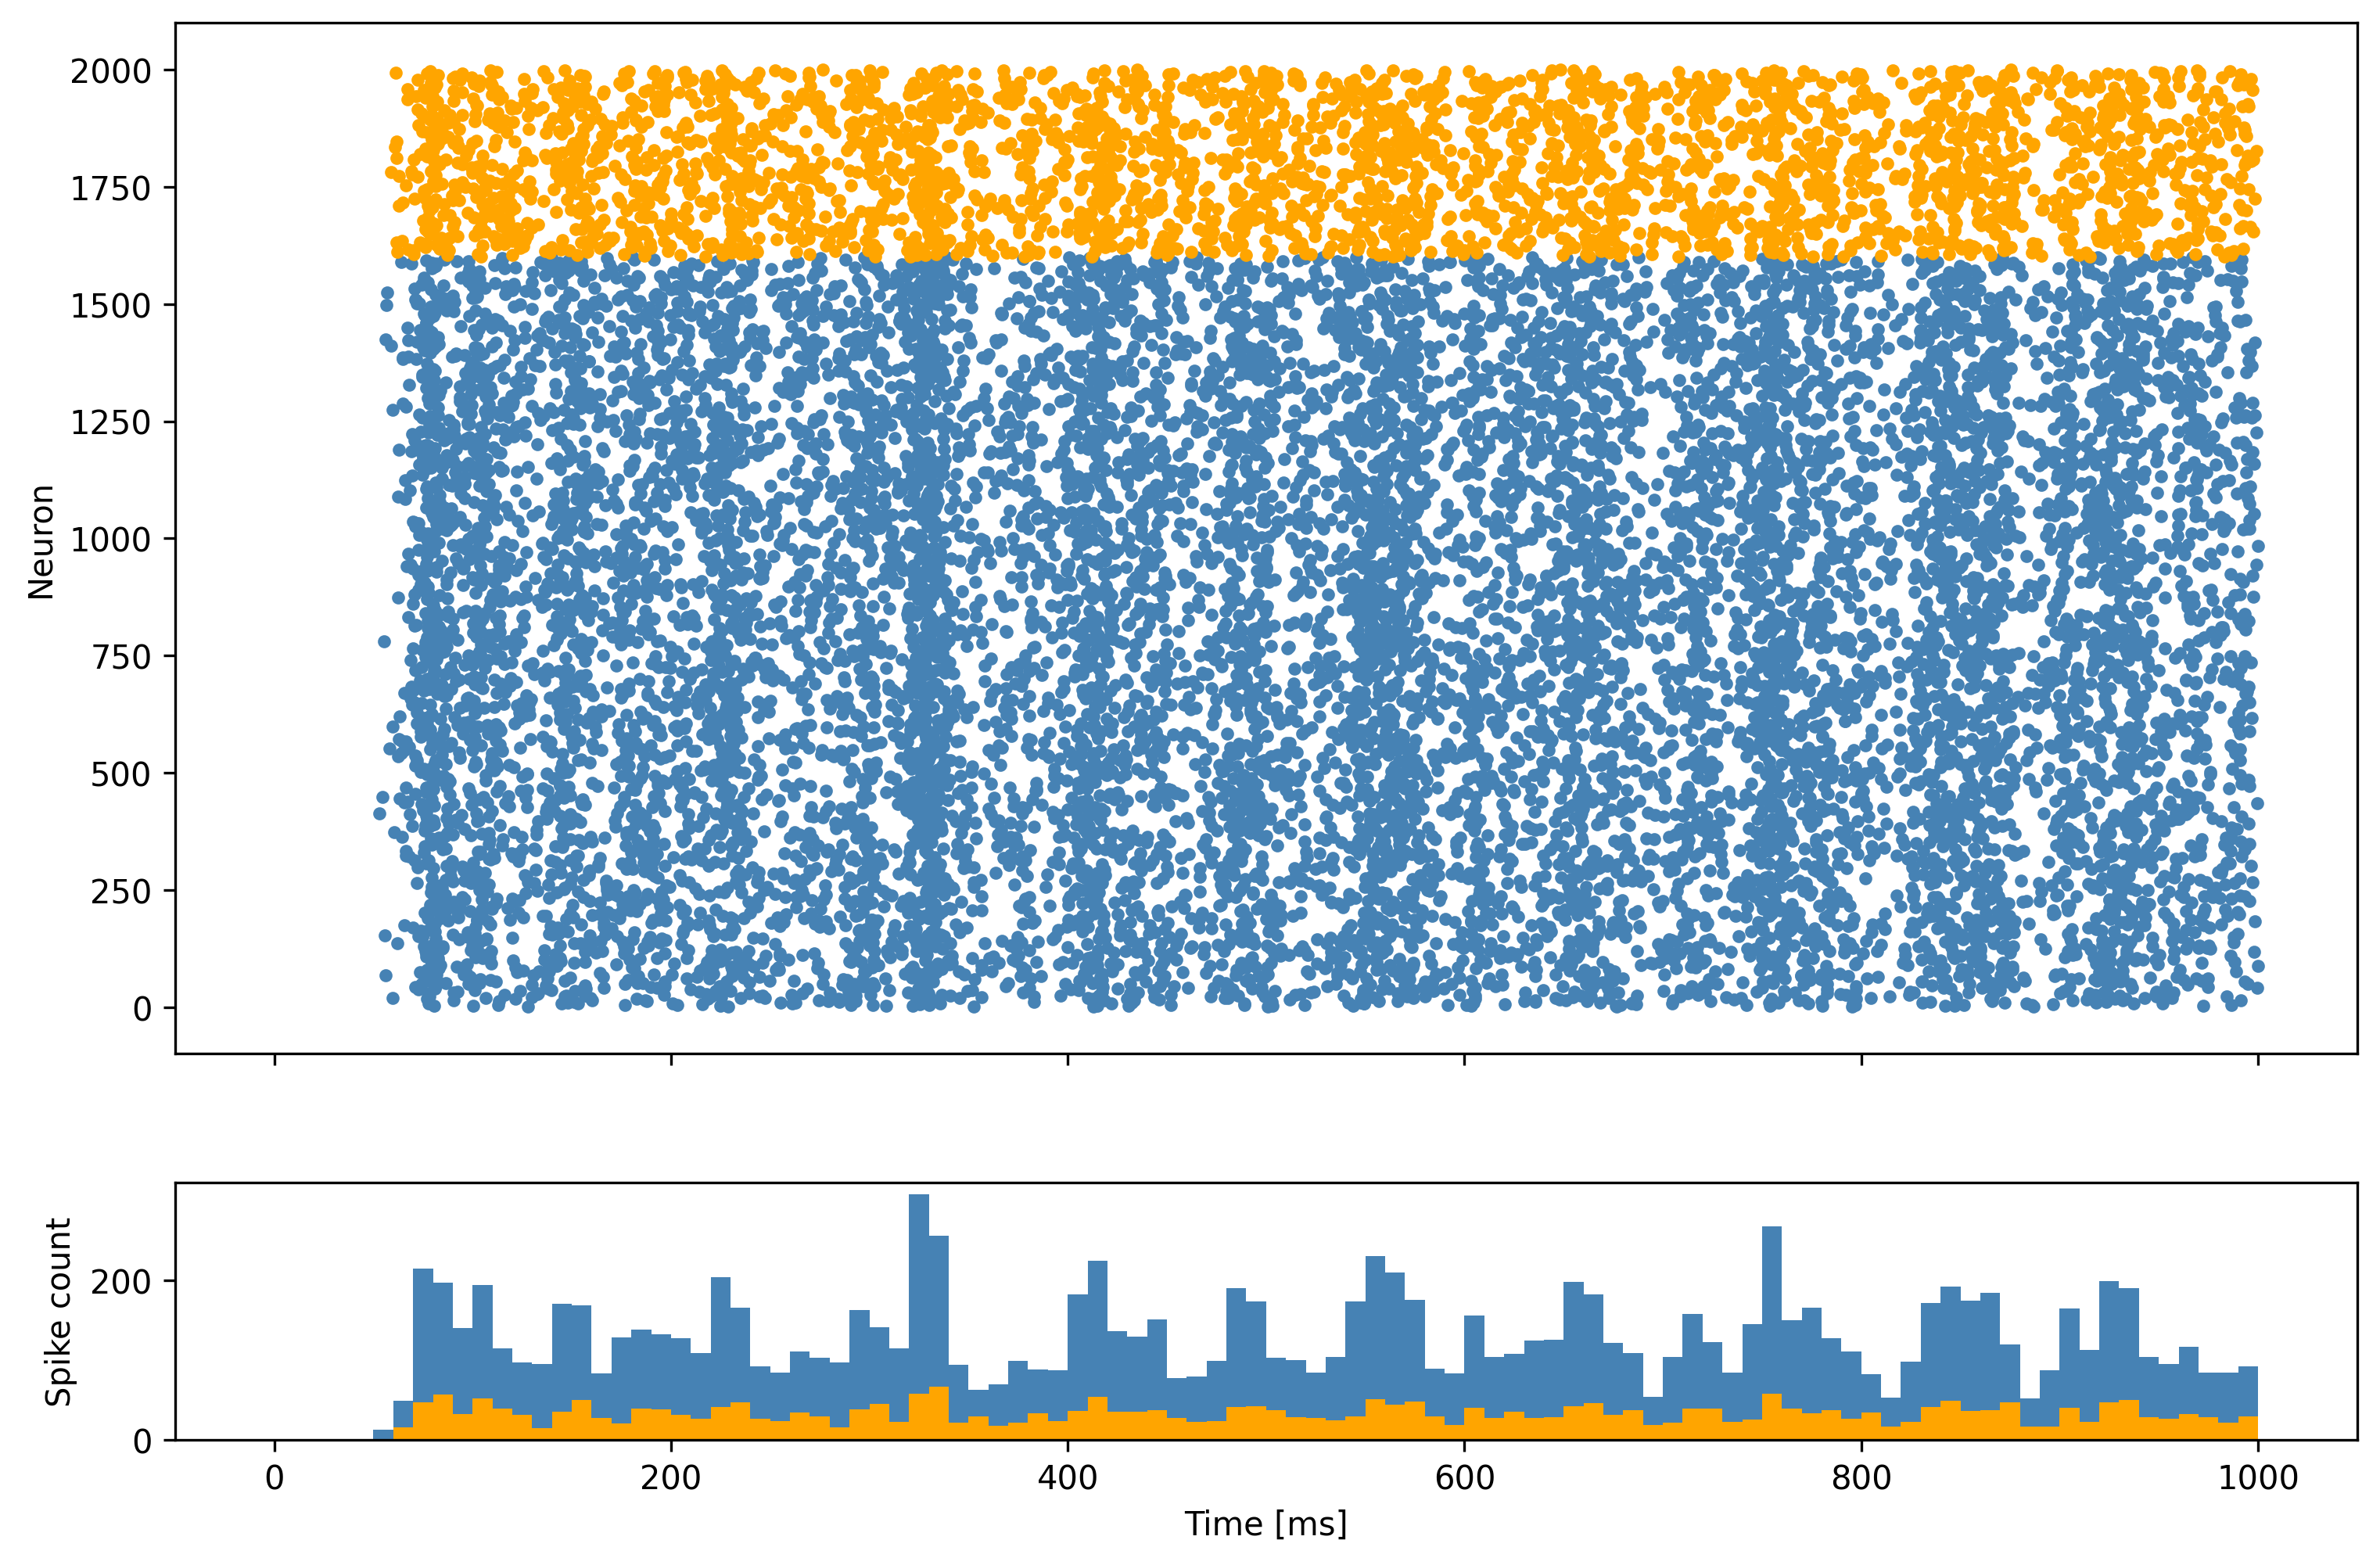

In [78]:
fig,(ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(12,8), dpi=300, sharex=True)

# Plot scatter of spikes
ax1.plot(eventsE['times'], eventsE['senders'], '.', color='steelblue')
ax1.plot(eventsI['times'], eventsI['senders'], '.', color='orange')
ax1.set_ylabel('Neuron')

# Plot histogram of spike count
ax2.hist(eventsE['times'], bins=range(0,1001,10), color='steelblue')
ax2.hist(eventsI['times'], bins=range(0,1001,10), color='orange')
ax2.set_ylabel('Spike count')
ax2.set_xlabel('Time [ms]')

print('Factor for the synapse strength of the recurrent inhibition: g = {}'.format(g))